[[Model]]
    Model(line)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 10
    # variables        = 2
    chi-square         = 0.96200981
    reduced chi-square = 0.12025123
    Akaike info crit   = -19.4131572
    Bayesian info crit = -18.8079870
    R-squared          = 0.99999626
[[Variables]]
    m:  4.29291309 +/- 0.00309715 (0.07%) (init = 4)
    b:  0.06824197 +/- 0.00703333 (10.31%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9962

Slope (m) = 4.29291 +/- 0.00310


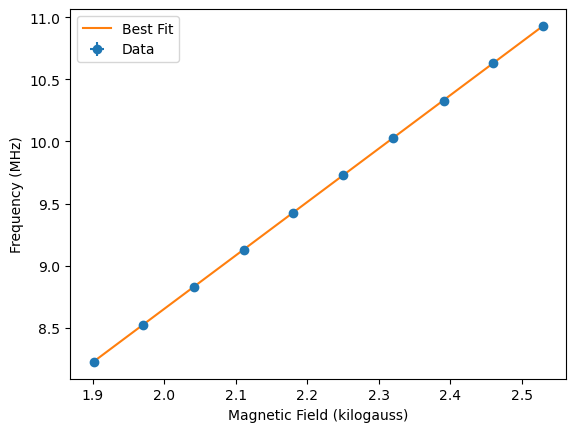

In [1]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt
from pathlib import Path

# --- 1. Load data ---
# This looks for 'NMR_data_I.csv' in your user's Documents folder
documents_path = Path.home() / 'Documents'
file_path = documents_path / 'NMR_data_I.csv'

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    # Fallback for demonstration if file isn't there:
    # df = pd.DataFrame({'Magnetic Field (kilogauss)': [...], 'Frequency (MHz)': [...]})
    exit()

x_data = df['Magnetic Field (kilogauss)'].values
y_data = df['Frequency (MHz)'].values
y_unc = df['Uncertainty (MHz)'].values
x_unc = df['Uncertainty (kilogauss)'].values

# --- 2. Define the model ---
def line(x, m, b):
    """Linear model: y = m*x + b"""
    return m * x + b

gmodel = Model(line)

# --- 3. Initialize parameters (m and b only) ---
params = gmodel.make_params(m=4, b=0) 

# Calculate weights based on uncertainties
y_div_x = y_data / x_data
rel_unc = np.sqrt(y_unc**2 + x_unc**2)
unc = rel_unc * y_div_x

# --- 4. Perform fit with weights ---
result = gmodel.fit(y_data, params, x=x_data, weights=1.0/unc)

# --- 5. Extract and Print results ---
print(result.fit_report())

m_fit = result.params['m'].value
m_err = result.params['m'].stderr
print(f"\nSlope (m) = {m_fit:.5f} +/- {m_err:.5f}")

# --- 6. Optional: Visualization ---
# (The original JSON contained plot data; adding a basic plot call here)
plt.errorbar(x_data, y_data, yerr=y_unc, xerr=x_unc, fmt='o', label='Data')
plt.plot(x_data, result.best_fit, '-', label='Best Fit')
plt.xlabel('Magnetic Field (kilogauss)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.show()